# On Regression & Distributional Assumptions

It is often said that linear regression makes the assumption that "the data are normally distributed." This statement is both imprecise and often misunderstood, and is often understood by students to mean that *if they were to plot the histogram of y, then it should be normal*.  This is not the correct interpretation of this assumption.  Let me show you why.

I'm going to make some data, plot the distribution of the data, and then fit OLS to the data.  I'll evaluate the fit of the model using $R^2$.  Remember, if the model fits the data well, then $R^2$ should be close to 1.

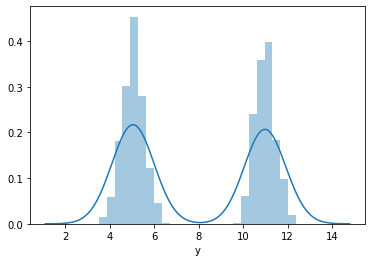

In [1]:
#Load in some libraries I want to use
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#Make me some data
np.random.seed(0)
N = 1000
x = np.random.binomial(1,0.5,size = N)
X = np.c_[np.ones(N), x]
b = np.array([5, 6])
y = np.random.normal(X@b, 0.5)

df = pd.DataFrame({'x':x, 'y':y})

#Plot the distribution of y
sns.distplot(df.y, bins = 25)

This data is bimodal!  If linear regression requires normally distirbuted data, then a linear regression couldn't possibly fit this data...right?

In [2]:
model = sm.ols('y~x', data = df).fit()
print(model.rsquared)

0.9743360849206124


Whoa, our rsquared is 0.97!  That's an incredibly good fit!  What's going on here?

Regression makes a more subtle assumption about the distribution of the data.  OLS makes the assumption that the *distribution of y conditioned on x is normal*.  Mathematically,

$$ y\vert \mathbf{x}  \sim \mathcal{N}(\mathbf{x}\beta, \sigma^2) $$

So let's say you fit an OLS model to data.  The assumption is that if you were to observe the outcome **for a particular value of $\mathbf{x}$** over and over, that *the resulting distirbution would be normal*, not that the histogram of the data would be normal.

And that is exactly what I did to make this example.  I regressed the outcome, `y`, onto a binary variable `x`.  When `x=1`, the data came from a normal distribution with mean 11, and when `x=0` the data came from a normal distirbution with mean 5.  That should be very clear when I plot the histograms and color the values of `y` depending on what their associated `x` is.

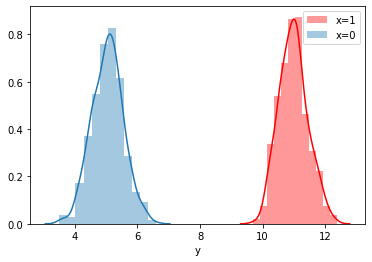

In [3]:
sns.distplot(df.query('x==1').y, bins = 12, color = 'red', label = 'x=1')
sns.distplot(df.query('x==0').y, bins = 12, color = 'C0', label = 'x=0')
plt.legend()

Note that all the `y` values with the same `x` are normally distributed.  That is what the assumption of normality really means in OLS.

This is the same for most all other regressions.  Poisson regression assumes that the distribution of `y` conditioned on `x` is poisson.  So just plotting the histogram of `y` is not enough to conclude what regression to use.

## The distribution of the residuals

Recall that the residuals in OLS are given by $\mathbf{y} - \mathbf{x}\beta$. Another way of stating the assumptions of OLS is to say that the residuals have mean 0 and variance $\sigma^2$. (Note that this implies the assumption of *homoskedasticity* - the assumption that the variance of the residuals does not depend on $\mathbf{x}$.)

If we plot the residuals, we can see in this case that their distribution is roughly normal.

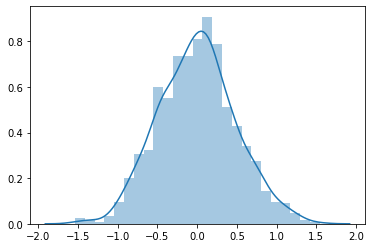

In [10]:
sns.distplot(model.resid)